[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/01-Introduccion-Preprocesamiento.ipynb)

# Introducción al Preprocesamiento de datos

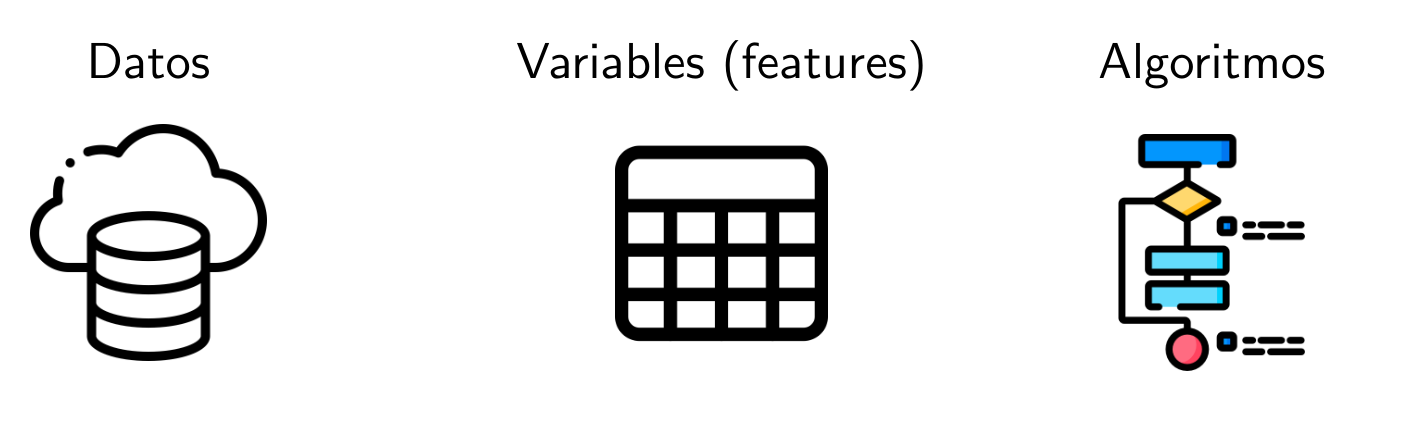

## Contenido de la sesión

En esta notebook trataremos la parte del preprocesamiento de datos.

    1.   Leyendo la información
    2.   Preprocesamiento de datos



---

![](https://raw.githubusercontent.com/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/img/ML-proceso.png)

##Scikit-Learn

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Scikit_learn_logo.svg/621px-Scikit_learn_logo.svg.png)

Librería muy usada para el Machine Learning en Python. Este proyecto fue iniciado en 2007 por David Cournapeau como parte del Google Summer of Code. En 2010, Fabian Pedregosa, Gael Varoquaux, Alexandre Gramfort y Vincent Michel, del INRIA, tomaron las riendas del proyecto e hicieron pública la primera versión el 1 de febrero de 2010.

La librería tiene una gran cantidad de algoritmos para muchos propósitos, desde el pre-procesamiento, el entrenamiento y optimización de modelos, métricas de desempeño, funciones de pérdida, etc. Las diferentes clases tiene un uso estandarizado e interactúan fácilmente entre ellas.

Guía de uso: https://scikit-learn.org/stable/user_guide.html

Documentación: https://scikit-learn.org/stable/

In [ ]:
import sklearn

**Referencias**

* Flach, P. A., 2012. Machine Learning : the Art and Science of Algorithms That Make Sense of Data. Cambridge University Press.

* Müller, A. C., \& Guido, S., 2016. Introduction to Machine Learning with Python: a Guide for Data Scientists. O'Reilly Media, Inc..

* García, S., Luengo, J., & Herrera, F., 2015. Data preprocessing in data mining (pp. 195-243). Cham, Switzerland: Springer International Publishing.

# Leyendo la información

El **preprocesamiento** de datos dentro de la Ciencia de Datos es FUNDAMENTAL.

Según el Foro Económico Mundial, **¡para 2025 generaremos alrededor de 463 exabytes (463 milliones de TB) de datos a nivel mundial por día!**. Entonces, deberiamos preguntarnos

*   ¿todos los datos son adecuados para ser utilizados por los algoritmos de aprendizaje automático?
*   ¿Cómo decidimos eso?

El **preprocesamiento** es el primer paso a realizarse antes de comenzar a aprender cualquier tipo de modelo, ya que la calidad de los datos y la información útil que puede derivarse de estos afectará directamente la capacidad de nuestros modelos.

**Garbage In, Garbage Out**

Cuando hablamos de datos, generalmente pensamos en conjuntos de datos en **forma  tabular o tablas de excel** (filas y columnas) con valores que una computadora es capáz de asimilar (números continuos) y sin datos faltantes.  

---
### Ejemplo 1: Dataset crediticio


Este dataset contiene instancias de solicitudes de tarjetas de crédito. Todos los nombres y valores de los atributos se han omitido proteger la confidencialidad de los datos.

650 clientes (filas), 15 variables explicativas (nominales/categóricas y númericas) así como una clase (en total 16 columnas).

Más información: https://archive.ics.uci.edu/ml/datasets/credit+approval

In [ ]:
import pandas as pd
from google.colab import data_table

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/crx.csv'
df1 = pd.read_csv(url,header=None)

data_table.DataTable(df1, include_index=True, num_rows_per_page=10)


¿Cómo identificarían si una variable, por ejemplo **A4** tiene valores faltantes?

In [ ]:
df1[3].unique()

De acuerdo a la información del dataset, las variables son:

* A1: b, a.
* A2: continuous.
* A3: continuous.
* A4: u, y, l, t.
* A5: g, p, gg.
* A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
* A7: v, h, bb, j, n, z, dd, ff, o.
* A8: continuous.
* A9: t, f.
* A10: t, f.
* A11: continuous.
* A12: t, f.
* A13: g, p, s.
* A14: continuous.
* A15: continuous.
* A16: +,- (class attribute)

## ¿Qué pasa cuando la información no se encuentra en formato de tabla

Si bien mucha información se encuentra en un formato tabular o algún otro compatible, no siempre es el caso.

Los datos pueden tener muchas formas diferentes:
* tablas estructuradas
* imágenes
* texto
* archivos de audio
* archivos de video

Las máquinas no entienden los datos de texto, imagen o video directamente, entienden los 1 y los 0. Por lo tanto, no es suficiente con hacer una presentación de diapositivas de todas nuestras imágenes y esperar que nuestro modelo de aprendizaje automático se entrene solo con eso.

Veamos un par de ejemplos.


### Ejemplo 1: Imágenes

¿Cómo podemos representarla para que una modelo entienda una imagen como un conjunto de features o variables independientes?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Leemos el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
plt.figure()
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

### Ejemplo 2: Texto

El enfoque más básico para trabajar con texto es la bolsa de palabras (*Bag of words*).

Comenzamos con un conjunto de tres textos

In [ ]:
docs = ['Mirabai has won a silver medal in weight lifting in Tokyo olympics 2021',
                 'Sindhu has won a bronze medal in badminton in Tokyo olympics',
                 'Indian hockey team is in top four team in Tokyo olympics 2021 after 40 years']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# La clase que hará la bolsa de palabras
vectorizer = CountVectorizer()

# Construimos la bolsa de palabras
bag = vectorizer.fit_transform(docs)

# Imprimimos las palabras del vocabulario
print(vectorizer.get_feature_names_out())

# Un diccionario con el índice de cada palabra
print(vectorizer.vocabulary_)

# La matriz de features
matriz = bag.toarray()
print(matriz)
print(f"Shape de la matriz {matriz.shape}")

⭕ Prueba con algunos textos escritos por tí. ¿Qué pasa con las stopwords eliminadas en español? ¿Distingue mayúsculas y minúsculas?

# Preprocesamiento de datos

En cualquier proceso de Machine Learning, el preprocesamiento (PP) es el paso en el que los datos se transforman o codifican para llevarlos a un estado tal que ahora la máquina pueda analizarlos fácilmente.

Estos son algunos de los tipos de problemas básicos así como la familia de técnicas de PP a la que pertenecen:
* ¿Cómo limpio los datos? ***Limpieza de datos***.
* ¿Cómo unifico y escalo los datos? ***Normalización de datos***.
* ¿Cómo proporciono datos precisos? ***Transformación de datos***.
* ¿Cómo manejo los datos faltantes? ***Imputación de datos perdidos***.
* ¿Cómo incorporo y ajusto datos? ***Integración de datos***.
* ¿Cómo detecto y manejo el ruido? ***Análisis del ruido***.

![](https://docs.google.com/uc?export=download&id=1-Dro_Qk1I63w2OAtjrFXRN2HcXMC07lo)




## Limpieza de Datos

Involucra operaciones como
* **Corrección** de datos
* **Filtrar datos** especificios o incorrectos
* **Reducir detalles** innecesarios.

Algunas veces se traslapa con otras técnicas de PP como la imputación de datos faltantes y análisis del ruido (aunque ambas categorías se ven por separado para un análisis más profundo).

Otras operaciones son la **detección de discrepancias** y **datos sucios** (fragmentos de los datos originales que no tienen sentido).

Esto típicamente requiere intervención humana ya que es necesaria la comprensión de los datos originales.

Continuamos con el ejemplo de la aprobación de créditos que comenzamos arriba al inicio de la notebook

In [ ]:
import pandas as pd
from google.colab import data_table

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/02-Machine-Learning/data/crx.csv'
df = pd.read_csv(url,header=None)
data_table.DataTable(df, include_index=True, num_rows_per_page=10)

Cambiamos los nombres de las columnas para hacerlos coincidir con los datos originales del dataset.

In [ ]:
mapping_dict = {j:'A'+str(j+1) for j in range(16)}
mapping_dict[15] = 'class'

df.rename(columns=mapping_dict, inplace=True)
df

Conservaremos el dataframe original en la variable `df`

🔵 Ejercicio:

1. Ahora queremos remover (por alguna razón) los registros de la matriz donde la variable A4 == 'u' (reducir detalles no necesarios).

2. También podriamos querer acotarnos a un rango de valores, por ejemplo para la
variable 'A3' entre 4 y 10 (filtrar datos específicos).

3. En particular, queremos cambiar el valor de la columna ``class`` de $\{-,+\}$ a $\{-1,1\}$ (corrección de datos).

Tarea 1. Remover los registros de la matriz donde la variable `A4` == 'u'.

Dos maneras de hacerlo:

In [ ]:
df_limpio_2 = df[df['A4']!='u'].copy()
df_limpio_2

In [ ]:
df[df['A4']=='u']
df_limpio = df.drop(index=df[df['A4']=='u'].index.tolist())
df_limpio

Tarea 2:  Acotar a un rango de valores, la variable 'A3' debe de estar entre 4 y 10.

In [ ]:
df_limpio = df_limpio[(df_limpio['A3']<=10)&(df_limpio['A3']>=4)]
print(df_limpio.shape)
df_limpio

Tarea 3: Cambiar el valor de la columna class de $\{−,+\}$ a $\{−1,1\}$. Dos maneras:

In [ ]:
# ---- Manera 1 ----

# def modificar_class(x):
#     modificado = 1
#     if x=='-':
#         modificado = -1
#     return modificado
# df_limpio['class'] = df_limpio['class'].apply(modificar_class)

# ---- Manera 2 ----
df_limpio.replace({"+":1, "-": -1}, inplace=True)

print(df_limpio.shape)
df_limpio

Una vez que hemos terminos de descartar algunos datos podemos resetear el índice.

In [ ]:
df_limpio.reset_index(inplace=True,drop=True)
df_limpio

⭕ Ejercicio:

¿Hay valores faltantes en alguna columna? En caso de que sí lo haya, eliminaremos dichas columnas. Al final, resetear el índice.

## Imputación de datos faltantes.

Por diversas razones, muchos conjuntos de datos del mundo real contienen valores perdidos. Sin embargo, estos conjuntos de datos son incompatibles con los estimadores de scikit-learn, que asumen que todos los valores de una matriz son numéricos.

Típicamente los valores faltantes están indicados como [numpy.nan](https://numpy.org/doc/stable/reference/constants.html#numpy.nan).

Hay varias estrategias para imputar valores faltantes:

* Descartar filas y/o columnas enteras que contengan valores perdidos. Sin embargo, esto tiene el precio de perder datos que pueden ser valiosos (aunque estén incompletos).
* Imputar los valores que faltan, es decir, deducirlos de la parte conocida de los datos. Por ejemplo:
    * Usar el promedio.
    * Usar la mediana.
    * Usar la moda (el valor más frecuente).
    * Usar algún valor constante.

En la mayoría de los casos, es mejor agregar una estimación razonable de un valor de datos adecuado que dejarlo en blanco.

Hay algunos patrones que se pueden presentar en los datos faltantes. Diferentes patrones pueden ser tratados con diferentes estrategias más especializadas.

<img src="https://stefvanbuuren.name/fimd/fig/ch04-patterns-1.png" width="700">

https://stefvanbuuren.name/fimd/missing-data-pattern.html




**¿Cómo exploramos los valores faltantes?**

Trabajaremos con la versión original del dataframe `df`. Exploremos, por ejemplo, los datos faltantes en la columna `A2`

In [ ]:
# Podemos ver las filas del dataframe que tienen valores faltantes en la columna A3:
display(df[df['A2'].isnull()])

# Podemos contar las filas del dataframe que tienen valores faltantes en la columna A3:
print(f"Cantidad de entradas nulas: {df[df['A2'].isnull()].shape[0]}")

Veamos los valores únicos de la columna

In [ ]:
df['A2'].unique()

In [ ]:
df.describe()

La información del dataset dice que las columnas `A2`, `A3`, `A8`, `A11`, `A14`, `A15` son continuas, sin embargo, la tabla anterior nos dice otra cosa.

![](https://pbpython.com/images/pandas_dtypes.png)

Exploremos los tipos de cada columna

In [ ]:
# Ver los tipos de datos de cada columna
df.dtypes

Cambiemos el tipo de las columnas `A2` y `A14`.

In [ ]:
import numpy as np

# Podríamos convertir el tipo así:
# df2 = df.copy()
# df2['A2'].astype('float')

def cambiar_tipo(x):
    try:
        return float(x)
    except:
        return np.nan

# Aplicamos la función en cada columna que presenta el problema
columnas = ['A2','A14']
for columna in columnas:
    df[columna] = df[columna].apply(cambiar_tipo)
df

Veamos cómo quedaron los tipos de las variables

In [ ]:
df.dtypes

¿Cuántos valores faltantes tiene la columna `A2`?

In [ ]:
df[df['A2'].isnull()].shape[0]

Veamos cómo se ven esos renglones

In [ ]:
df[df['A2'].isnull()]

Hagamos la imputación de valores faltantes en la columna `A2`. Para esto usaremos scikit-learn, el cual tiene un [submódulo](https://scikit-learn.org/stable/modules/impute.html) para hacer imputación.

In [ ]:
from sklearn.impute import SimpleImputer

A2_values = df['A2'].values

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
A2_new_values = imp.fit_transform(A2_values.reshape(-1,1))
A2_new_values

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(A2_values)
plt.axvline(x=np.nanmean(A2_values))
plt.subplot(1,2,2)
sns.histplot(A2_new_values)
plt.axvline(x=np.mean(A2_new_values))
plt.show()

¿Cómo son ambos promedios?

In [ ]:
np.nanmean(A2_values),np.mean(A2_new_values)

❓ ¿Por qué son iguales?

Regresemos la nueva columna al dataframe original

In [ ]:
df['A2'] = A2_new_values.reshape(-1,)
df

Comprobemos que ya no hay entradas faltantes en esa columna

In [ ]:
df[df['A2'].isnull()]

También funciona para valores categóricos, aunque sólo en las estrategias `most_frequent` y `constant`. Veamos la columna `A4`.

In [ ]:
df['A4'].unique()

In [ ]:
sns.countplot(x=df['A4'])
plt.show()

In [ ]:
imp_categorico = SimpleImputer(missing_values='?', strategy='most_frequent')
A4_new_values = imp_categorico.fit_transform(df['A4'].values.reshape(-1,1))

⭕ Regresa la nueva columna al dataframe original, comprueba que ya no hay valores faltantes.

## Normalización de los Datos (re-escalamiento).

La unidad de medida utilizada puede afectar el análisis de datos.

>> Por ejemplo: típicamente los datos atmosféricos en Cuernavaca, reflejan una  temperatura acotada entre 8 a 40 °C, mientras que la presión atmosférica esta data entre 950 a 1050 mbar.  
>> * ¿Qué variable predomina más?
>> * ¿Qué cambio produce un mayor efecto, una diferencia de 5°C de temperatura o 5 mbar de presión?

**La normalización de los datos intenta dar a todos los atributos el mismo peso, expresando cada variable en las mismas unidades de medida y así como una escala en común (determinada).**

Se trata de re-escalar el intervalo en el que se encuentran los datos al intervalo $[0,1]$ (o cualquier otro).

🔵 Ejercicio:

1. Escalar los valores de las columnas A3 y A15 entre 0 y 1.

Utilice la siguiente formula:

$$x_{new} = \frac{x-a}{b-a}$$

tal que

$$a=\min(x),\ b=\max(x)$$

2. Escalar las mismas columnas pero entre dos valores arbitrarios $q$ y $z$, tal que $q<z$.

Utilice la siguiente formula:

$$x_{qz}= (z-q)\cdot x_{new}+q$$


Una de las raíces de las dificultades que se presentan al tener escalas de valores muy diferentes es el **error de absorción**:

In [ ]:
eps = 0.0000000000001
x0 = 100000
num_iteraciones = 10000

for k in range(num_iteraciones):
    x0 += eps
print(f"Estrategia 1: {x0}")

x_final = x0 + num_iteraciones*eps
print(f"Estrategia 2: {x_final}")

Continuamos con la normalización de datos

In [ ]:
a3 = df_limpio['A3'].min()
b3 = df_limpio['A3'].max()
print(f"El máximo y mínimo de la columna 'A3': {b3,a3}")
a15 = df_limpio['A15'].min()
b15 = df_limpio['A15'].max()
print(f"El máximo y mínimo de la columna 'A15': {b15,a15}")

df_limpio['A3'] = df_limpio['A3'].apply(lambda x: (x-a3)/(b3-a3))
df_limpio['A15'] = df_limpio['A15'].apply(lambda x: (x-a15)/(b15-a15))
df_limpio

Usando el módulo ``preprocessing`` de Scikit-Learn

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
datos_normalizados = scaler.fit_transform(df_limpio[['A3','A8']])
datos_normalizados

In [ ]:
df_limpio.loc[:,['A3','A8']] = datos_normalizados
df_limpio

⭕ Ejercicio.

Aplica esta normalización a todos las columnas de datos y muestra el dataframe con los datos normalizados. **Ten cuidado con posibles datos faltantes**

## Transformación de Datos

En este paso los datos se **convierten o consolidan** para que el resultado del modelado sea más *eficiente/efectivo*.

Entre las técnicas de transformación de datos se encuentra
* el **suavizamiento**.
* **construcción de características**.
* **agregación o resumen** de datos.
* **discretización**.
* **generalización**.

Sin embargo, la mayoría de estas se pueden considerar como áreas independientes.

Las tareas que requieren supervisión humana son las técnicas clásicas de transformación de datos como:
* la generación de informes
* nuevos atributos que agregan los existentes
* generalización de conceptos, especialmente en atributos categóricos (por ejemplo, la sustitución de fechas completas por solo números de año).

🔵 Ejercicio: One-Hot Encoding

One-Hot Encoding es la transformación de variables nominales/categóricas en númericas. Esta transformación consiste en convertir cada valor $v_i$ de una variable $V$ ($v_i\in V$), en columnas. De tal suerte, que si la variable $V$ tiene tres valores ($|V|=3$), esta será reemplazada por V1, V2 y V3, en donde se pondrá un 1 si $V1 = v_i$, de otra forma 0; se aplica el mismo principio para V2 y V3.

![](https://docs.google.com/uc?export=download&id=18CttdKmICOmEvQ82JEJwQbdnxO3myjnU)


**Actividad**: Aplicar el One-Hot-Encoding a las variables A4 y A5 del conjunto de aprobación de crédito.

¿Qué valores toman las variables categóricas

In [ ]:
df['A4'].unique()

Creamos las columnas con *one-hot encoding*

In [ ]:
cat_columns = ['A4','A5']
df_proc = pd.get_dummies(df,prefix='category',prefix_sep='_',columns=cat_columns)
df_proc.sample(10)

## Integración de Datos.

Comprende la fusión de datos de múltiples fuentes de datos.

Este proceso debe realizarse con cuidado para evitar redundancias e inconsistencias en el conjunto de datos resultante.

Las operaciones típicas logradas dentro de la integración de datos son la
* **identificación** y **unificación** de variables y dominios
* **análisis de correlación** entre atributos
* **identificación de duplicación** y **detección de conflictos** en los valores de datos de diferentes fuentes.

## Identificación de Datos Anómalos/Outliers.

El objetivo principal es detectar errores aleatorios o variaciones en una variable medida. Tenga en cuenta que nos referimos a este proceso como  **identificación** de ruido en lugar de la **eliminación** de ruido.

<img src="https://www.mdpi.com/energies/energies-12-03310/article_deploy/html/images/energies-12-03310-g002.png" width="600">

Una vez que se detecta un ejemplo ruidoso, podemos aplicar un proceso basado en la corrección que podría involucrar algún tipo de operación subyacente.

<img src="https://anomaly.io/wp-content/uploads/2017/01/correlation-anomaly-detected.png" width="800" align="middle">

---


## Reducción de Datos

La **reducción de datos** comprende el conjunto de técnicas que, de una forma u otra, obtienen una representación reducida de los datos originales.

El **objetivo** de la redución de los datos es ***encontrar un sub-conjunto $C'$ tal que se aproxime al conjunto original $C$ tal que la información contenida en $C' \approx C$***. Esto típicamente significa que se mantienen la estructura esencial de los datos originales ($C$), pero la cantidad de datos se reduce.

![](https://docs.google.com/uc?export=download&id=1kJvqifJpTjT-3NjyUzdD-6EvYGPSHE3v)

Algo interesante, es que mientras el PP es fundamental, la reducción de datos puede considerarse como *opcional*. Sin embargo, existen muchas razones por las cuales este proceso es más que una sugerencia:

* Para su ejecución y de acuerdo a formulación, todos los algoritmos de ML estan sujetos a un
  * **tiempo de computo específico**
  * **memoria** específica.
  * **tamaño del conjunto de datos**

  Entonces, si el tamaño del conjunto de datos es mayor al limite de un algoritmo, el tiempo de computo se volverá **prohibitivo**.  




Feature Selection: Son las técnicas para elegir ciertas variables que mejor representen a un conjunto de datos. Podemos considerarla como una técnica de reducción de dimensionalidad.

* [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) selecciona las mejores $k$ variables de acuerdo a alguna prueba estadística.
* [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold) elimina variable con una varianza baja. Esto no se combina bien con la normalización.

En el siguiente ejemplo, descartamos la tercera coordenada:

$$(x,y,z)\mapsto (x,y)$$

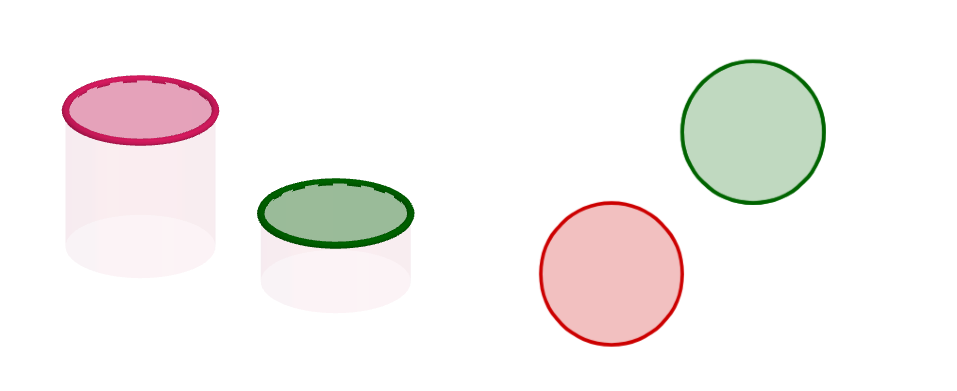

Respecto a la **memoria** y **tamaño del conjunto de datos**, estos se encuentra relacionados a la **Maldición de la Dimensionalidad** (Curse of Dimensionality en inglés).
La maldición de la dimensionalidad es una familia de fenómenos relacionados a aquellos problemas descritos por muchas dimensiones, lo que no sucede en aquellos sistemas de pocas dimensiones.

**Alta Dimensionalidad**

***Espacio de Características*** (Feature Space en inglés); determina todo el posible conjunto de combinaciones (realistas o no) de los valores que tendrán las variables del problema.

Ahora supongamos que queremos realizar una predicción usando solo una dimensión que esta acotada entre 0 y 1, $X^D \mid D=1,\ 0\leq x_1 \leq 1$. En este caso, podemos conocer $1/3$ de todos los posibles resultados conociendo una tercera parte de la variable $x_1$, como se observa en la siguiente figura  
![](https://docs.google.com/uc?export=download&id=1DCqkNuAH2Dc32HOz04aBBekn8nAk1zHH)
        
Si ahora utilizamos dos variables, $X^D \mid D=2, 0\leq x_1,\ x_2 \leq 1$, y dividimos ambas en 3 partes, podemos dibujar un cuadrado que cubra $1/3$ de los valores de cada variable en 3 partes. Sin embargo, este cuadrado, no cubre $1/3$ parte de todas las combinaciones de $x_1 \text{ y } x_2$, en cambio, ¡solo cubre $1/9 \approx 11 \text{%}$!
![](https://docs.google.com/uc?export=download&id=18wZ8GWiQNYnZMGvIKyAvSqyT1dfDE_lK)

Si añadimos una tercer variable y repetimos el mismo proceso, el cubo resultante solo cubrirá $1/27 \approx 4\text{\%}$ de todas las posibles combinaciones.        
![](https://docs.google.com/uc?export=download&id=1rBP3TXW2SjowCslJOEa9SN0RlOdwir90)

De hecho

<img src="https://docs.google.com/uc?export=download&id=18hw5NcUSEKAZw9VJkZzH5-AjqcYWgl2L" width="600" style="background-color:white;">




# ⭕ Práctica: Dateset PIMA

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. **Missing values are believed to be encoded with zero values**. The variable names are as follows:

    Number of times pregnant.
    Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
    Diastolic blood pressure (mm Hg).
    Triceps skinfold thickness (mm).
    2-Hour serum insulin (mu U/ml).
    Body mass index (weight in kg/(height in m)^2).
    Diabetes pedigree function.
    Age (years).
    Class variable (0 or 1).

Más información: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
df = pd.read_csv(url,header=None)

df

⭕ Ejercicio 1

* Modificar el nombre de las columnas de acuerdo a la información anterior.

* Hacer un análisis exploratorio:
    * ¿Qué tipo de variable es cada columna?
    * ¿Hay datos faltantes en alguna columna? Toma en cuenta la información del dataset y auxiliate de histogramas y otras herramientas exploratorias.
    * ¿Qué variable tiene más datos faltantes?
    * ¿Qué rango tienen los datos en cada columna?

⭕ Ejercicio 2

Realizar las siguientes tareas de preprocesamiento:

* Para lididar con los valores faltantes hay dos opciones: Eliminar los renglones con valores faltantes o imputarlos. ¿Cuál eliges y por qué? Realiza esta tarea en todas las columnas.
* Filtrar los valores del BMI en algún rango de tu elección.
* Normalizar todos los valores continuos.
* Cambiar las variables categóricas por *one-hot*